In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
df = pd.read_csv(r'data\OnlineNewsPopularity.csv' , sep=r'\s*,\s*')
df.info()

C:\Users\Mahta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [21]:
df.shape

(39644, 61)

In [22]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [23]:
popular=df.shares>=1400
unpopular=df.shares<1400

In [24]:
df.loc[popular , 'shares'] = 1
df.loc[unpopular , 'shares'] = 0

In [25]:
df.columns[60]

'shares'

In [26]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [27]:
cols=["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
      "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
     "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
     "weekday_is_saturday","weekday_is_sunday"]

In [28]:
cols1=["global_subjectivity","rate_positive_words","rate_negative_words",
     "avg_positive_polarity","min_positive_polarity","max_positive_polarity","avg_negative_polarity","min_negative_polarity",
     "max_negative_polarity","title_subjectivity","abs_title_sentiment_polarity"]

In [29]:
data = df
df.shape

(39644, 61)

In [30]:
cols2=["url","timedelta","shares"]

In [31]:
for i in data.columns:
    if i not in cols and i not in cols1 and i not in cols2:
        data[i]=np.log(1.001+data[i])

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,2.565026,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.206409,0.001000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,2.302685,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.001000,0.406132,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,2.302685,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.001000,0.406132,0.000000,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,2.302685,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.001000,0.406132,0.000000,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,2.639129,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.128713,0.045408,0.136364,0


In [32]:
features=list(df.columns[2:60])
X_train,X_test,y_train,y_test=train_test_split(df[features],df['shares'],test_size=0.1,random_state=0)

In [33]:
rf=RandomForestClassifier(n_estimators=300,n_jobs=-1)
clf_rf=rf.fit(X_train,y_train)
print ("Random Forest")
print ("Accuracy= ",clf_rf.score(X_test,y_test))
y_pred=clf_rf.predict(X_test)
precision=precision_score(y_test,y_pred)
print ("Precision= ",precision)
recall=recall_score(y_test,y_pred)
print ("Recall= ",recall)
f1_scorer=f1_score(y_test,y_pred)
print ("f1_score= ",f1_scorer)

Random Forest
Accuracy=  0.6726355611601513
Precision=  0.6717724288840262
Recall=  0.7369179068650984
f1_score=  0.7028388278388278


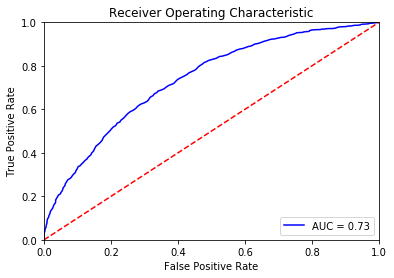

In [34]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1132  750]
 [ 548 1535]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.64      1882
           1       0.67      0.74      0.70      2083

    accuracy                           0.67      3965
   macro avg       0.67      0.67      0.67      3965
weighted avg       0.67      0.67      0.67      3965

Accuracy: 0.6726355611601513
